In [ ]:
for i in range(1, 11):
  print(i)

#Add the numbers 1 to 15
sum = 0
for i in range(1, 16):
  sum = sum + i
print(sum)

1
2
3
4
5
6
7
8
9
10
120


In [ ]:
vecEx = [0,1,0,0,1,0,0,0,1,0,0,0,0,1]
print(vecEx)
count0 = 0
count1 = 0
for i in range(len(vecEx)):
  if vecEx[i] == 0:
    count0 = count0 + 1
  elif vecEx[i] == 1:
    count1 = count1 + 1
print("There are", count0, "zeros")
print("There are", count1, "ones")

[0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1]
There are 10 zeros
There are 4 ones


In [ ]:
#Below is a function that places someone by looking at:
# x = SAT score
# y = GPA

def cutoff(x, y):
  if x >= 529 or y >= 2.5:
    return "GenEd"
  else:
    return "Remedial Work"

  #Test the function
cutoff(700, 4)

'GenEd'

In [ ]:
from pandas import *
import numpy as np

StudData = read_csv("EnglishClassPlacement.csv")
print(type(StudData)) #Tells me the type of data
#print(StudData) #Will print my data to the screen

StudData.shape #Tells me the size of my data (32 rows, 3 columns)
StudData.dtypes #Tells me the types of my columns
StudData['SAT Essay Score'].describe()
StudData['English-Only GPA'].describe()

#Accessing the data in a column
#StudData.Student #This only works if you don't have spaces
#StudData['Student'] #This method works with spaces! See lines 10 & 11
#StudData.iloc[:,0] #iloc allows you to call by position [row, column], ":" calls all rows; the 0th column

#Prints everything from SAT Score
#print(StudData['SAT Essay Score'])
#Only prints the last line when 'print' is not used
StudData['SAT Essay Score'].sum()
StudData['SAT Essay Score'].mean()
#print(StudData['SAT Essay Score'].median())
#print(StudData['SAT Essay Score'].min())
#print(StudData['SAT Essay Score'].max())
StudData['SAT Essay Score'].nunique() #Prints the number of unqiue entries there are

StudData[['Student', 'SAT Essay Score']]
StudData.iloc[:, [0, 1]]
StudData.iloc[9, :] #Pulls out the 10th row from the table
StudData[StudData["Student"]=="Aladdin"] #Finds and prints the row corresponding to the student named Aladdin

#Rename a column
StudData=StudData.rename(columns={"SAT Essay Score": "SATEssayScore"})
#print(StudData)

#Missing Data
print(StudData.isnull().values.any()) #Tells me whether or not I have missing data
print(StudData.isnull().sum().sum()) #This tells us how many missing values we have

#Replace missing values
#IT MATTERS WHAT YOUR END GOAL IS
StudData['SATEssayScore'].fillna(0, inplace=True)
#print(StudData)

ENGclass = []
#print(len(StudData))
for i in range(0, len(StudData)):
  Recommend = cutoff(StudData.iloc[i,1], StudData.iloc[i,2])
  ENGclass.append(Recommend)

#print(ENGclass)
StudData['EnglishClass'] = ENGclass
print(StudData)

StudData.to_csv("NewStudData.csv", index=False, encoding='utf8')

import openpyxl
StudData.to_excel("NewStudData.xlsx", sheet_name = "Sheet 1", index=False)

<class 'pandas.core.frame.DataFrame'>
True
5
       Student  SATEssayScore  English-Only GPA   EnglishClass
0      Aladdin            0.0             3.500          GenEd
1        Genie          650.0             3.333          GenEd
2      Jasmine          500.0             4.000          GenEd
3        Jafar          450.0             3.798          GenEd
4          Abu          700.0             4.000          GenEd
5         Iago          750.0             2.500          GenEd
6       Sultan          300.0             4.000          GenEd
7         Chip            0.0             2.750          GenEd
8        Beast          780.0             4.000          GenEd
9        Belle          470.0             3.498          GenEd
10       Lefou          450.0             2.000  Remedial Work
11     Maurice          350.0             3.786          GenEd
12  Mrs. Potts          630.0             3.975          GenEd
13     Lumiere          310.0             3.870          GenEd
14   Cogsw

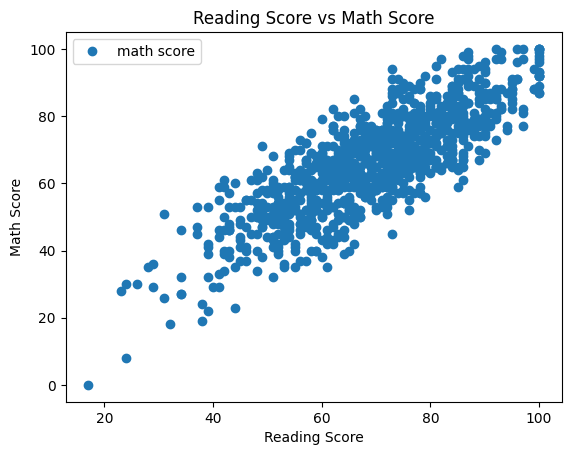

In [ ]:
import numpy as np
import pandas as pd
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics #Helps us decide if we have a good fit model
import matplotlib.pyplot as plt #We want to plot to be able to visual our data

Testdat = pd.read_csv("StudentsPerformance.csv", index_col = 0)
Testdat.head() #Allows us to see the first five rows of our data
Testdat.describe() #General descriptive summaries of the data loaded

Testdat.plot(x = 'reading score', y = 'math score', style ='o')
plt.title('Reading Score vs Math Score')
plt.xlabel('Reading Score')
plt.ylabel('Math Score')
plt.show()

Testdat['reading score'].shape
X = Testdat['reading score'].values.reshape(-1,1)
Y = Testdat['math score'].values.reshape(-1,1)

[[0.86132413]]
[6.40750886]


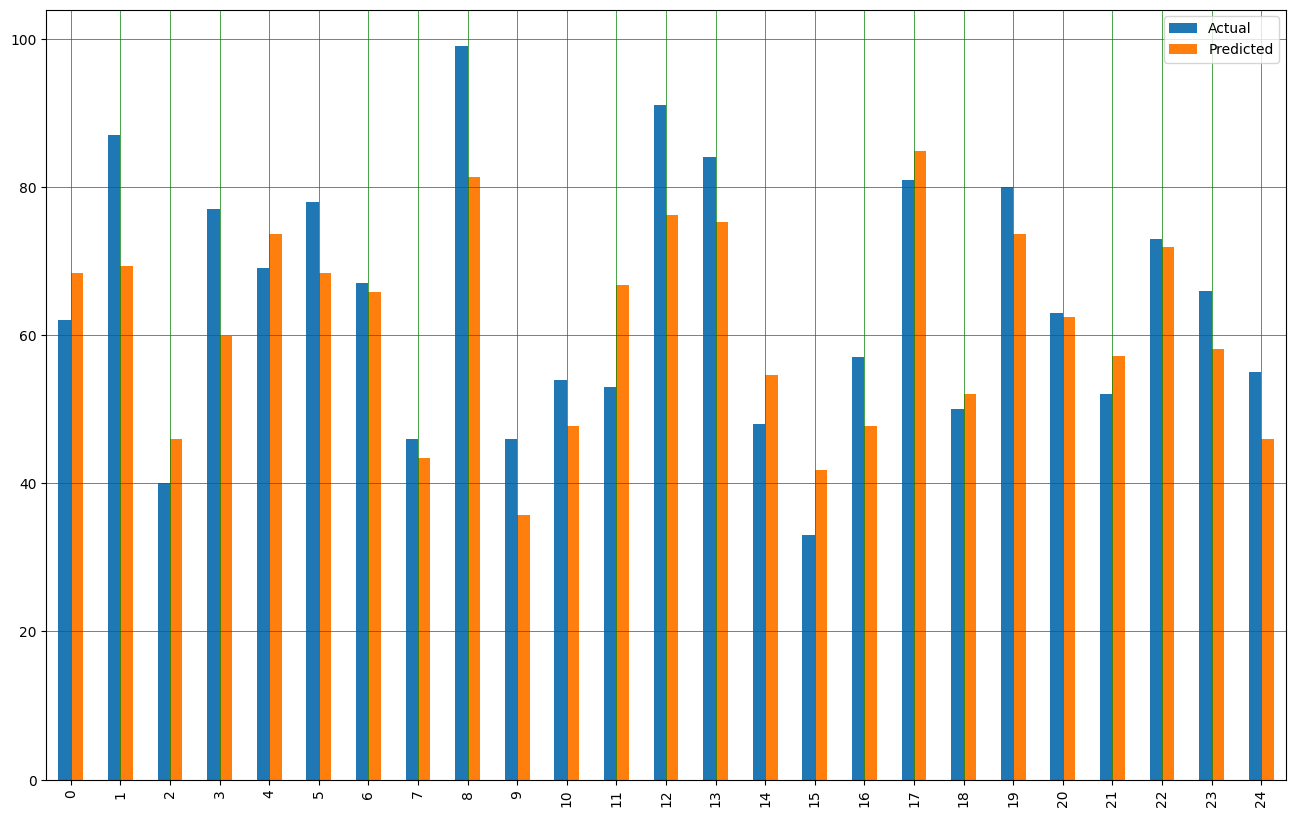

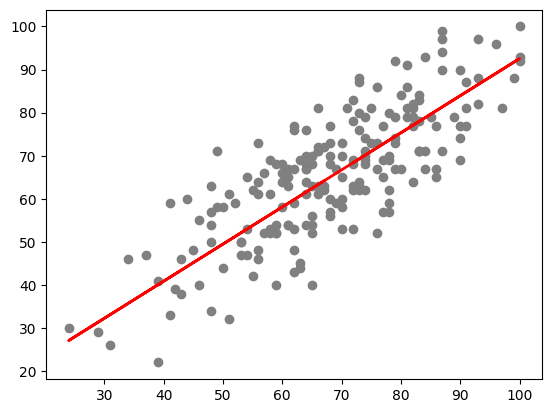

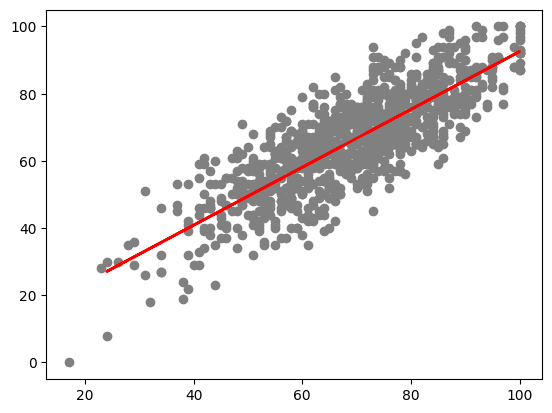

In [ ]:
#Split your data into two groups to avoid overfitting: Training and Validation
#Will use 80% of our data for training, 20% for validation (random 80/20%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
#Python already knows our line of best fit, now we need to ask for it
print(regressor.coef_)
print(regressor.intercept_)
Y_pred = regressor.predict(X_test)

#We're going to make a new dataframe
df = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': Y_pred.flatten()})
df

df1 = df.head(25) #This makes a new dataframe with the first 25 of our entire dataframe
df1.plot(kind = 'bar', figsize = (16, 10))
plt.grid(which = 'major', linestyle = '-', linewidth = '0.5', color = 'green')
plt.grid(which = 'minor', linestyle = ':', linewidth = '0.5', color = 'black')
plt.show()

plt.scatter(X_test, Y_test, color = 'gray') #Makes the scattered points
plt.plot(X_test, Y_pred, color = 'red', linewidth = 2) #Makes the line of best fit
plt.show()

plt.scatter(X, Y, color = 'gray')
plt.plot(X_test, Y_pred, color = 'red', linewidth = 2)
plt.show()

In [ ]:
#Calculate R^2
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred, sample_weight = None, multioutput = 'uniform_average')

0.6203745343670679